# Pertemuan 11
## Modul 2
Nama : Fauzan Kamil <br>
NPM : 201910225134


---


#<br>Data Mining
# K-NN & Naive Bayes






# K-NN

In [40]:
#Impor pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [46]:
#Mengambil data dari file csv
datasiswa=pd.read_csv('beasiswa.csv')
X=np.asarray(datasiswa)
x_train=X[:,1:3]
y_train=X[:,3:4]

In [47]:
datasiswa

,Mahasiswa,IPK,Tingkat Kemiskinan (TM),Beasiswa/Tidak
0,1,0.8,0.8,0.0
1,2,1.2,1.0,0.0
2,3,1.0,1.2,0.0
3,4,2.0,1.5,0.0
4,5,0.7,1.5,0.0
5,6,2.5,3.0,1.0
6,7,3.0,2.5,1.0
7,8,3.0,2.0,1.0
8,9,3.0,3.0,1.0
9,10,3.5,3.9,1.0


In [50]:
#Memanggil KNN
knn=KNeighborsClassifier(n_neighbors=4,
                        weights='uniform',
                        algorithm='auto',
                        metric='euclidean')
#Fit model dengan data latih dan target/label
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [51]:
#Mengambil data dari file csv
datavalidasi=pd.read_csv('validasibeasiswa.csv')
df2=pd.DataFrame(datasiswa,columns=['Mahasiswa','IPK','Tingkat Kemiskinan (TM)','Beasiswa/Tidak'])
X2=np.asarray(datavalidasi)
x_val=X2[:,1:3]
y_val=X2[:,3:4]

In [52]:
datavalidasi

,Mahasiswa,IPK,Tingkat Kemiskinan (TM),Beasiswa/Tidak *
0,1,0.7,0.7,0
1,2,1.2,1.1,0
2,3,0.6,1.6,0
3,4,2.4,3.1,1
4,5,3.0,2.4,1
5,6,3.4,3.8,1
6,7,2.6,3.4,1


In [53]:
x_val

array([[0.7, 0.7],
       [1.2, 1.1],
       [0.6, 1.6],
       [2.4, 3.1],
       [3. , 2.4],
       [3.4, 3.8],
       [2.6, 3.4]])

In [54]:
#Prediksi
y_pred=knn.predict(x_val)
print((y_val).T)
print(y_pred)
print(classification_report(y_val,y_pred))

[[0. 0. 0. 1. 1. 1. 1.]]
[0. 0. 0. 1. 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



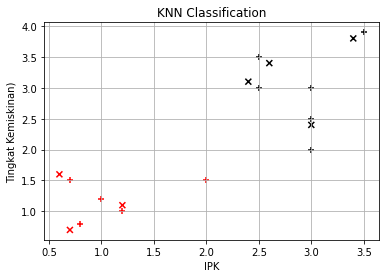

In [55]:
#Visualisasi Data
#plot Data Latih
absis=[x_train[:,0]]
ordinat=[x_train[:,1]]
target=[X[:,3]]
plt.scatter(absis, ordinat, alpha=2, c=target, cmap='flag', marker='+')
#plot Data Uji
absis=[x_val[:,0]]
ordinat=[x_val[:,1]]
target=[X2[:,3]]
plt.scatter(absis, ordinat, alpha=2, c=target, cmap='flag', marker='x')
#Label
plt.xlabel("IPK")
plt.ylabel("Tingkat Kemiskinan)")
plt.title("KNN Classification")
plt.grid()

In [ ]:
data=[[3.3,1.5]]
prediksi=knn.predict(data)
print(prediksi)

[1.]


# Naive Bayes

In [1]:
import pandas as pd
import numpy as np

In [28]:
data = pd.read_csv("beasiswa.csv")
data.tail()

,Mahasiswa,IPK,Tingkat Kemiskinan (TM),Beasiswa/Tidak
6,7,3.0,2.5,1.0
7,8,3.0,2.0,1.0
8,9,3.0,3.0,1.0
9,10,3.5,3.9,1.0
10,11,2.5,3.5,1.0


In [31]:
x = data.drop(["Beasiswa/Tidak"], axis = 1)
x.tail()

,Mahasiswa,IPK,Tingkat Kemiskinan (TM)
6,7,3.0,2.5
7,8,3.0,2.0
8,9,3.0,3.0
9,10,3.5,3.9
10,11,2.5,3.5


In [32]:
y = data["Beasiswa/Tidak"]
y.tail()

6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
Name: Beasiswa/Tidak, dtype: float64

In [33]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [34]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x_train, y_train)
nbtrain.class_count_

array([3., 5.])

In [35]:
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)
y_pred

array([0., 1., 0.])

In [36]:
# Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(x_test)

array([[1.00000000e+00, 5.92979853e-17],
       [8.41074073e-30, 1.00000000e+00],
       [1.00000000e+00, 3.08224385e-16]])

In [37]:
# import confusion_matrix model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2, 0],
       [0, 1]])

In [38]:
# Merapikan hasil confusion matrix
y_actual1 = pd.Series([0, 0, 1], name = 'actual')
y_pred1 = pd.Series([1,1,0], name = 'prediction')
df_confusion = pd.crosstab(y_actual1, y_pred1)
df_confusion

prediction,0,1
actual,,
0,0,2
1,1,0


In [39]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

